In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
symbol = 'PBR'
start = '2012-01-01' 
end = '2018-09-11'
df = yf.download(symbol, start, end)
# df = df.reset_index()

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03
mean,12.681443,12.881591,12.464608,12.670119,12.343256,2.397733e+07
std,5.898624,5.946339,5.837364,5.894078,5.480787,1.510362e+07
min,2.880000,2.970000,2.710000,2.900000,2.888363,4.309000e+06
25%,8.677500,8.837500,8.527500,8.687500,8.652639,1.404630e+07
50%,11.105000,11.285000,10.945000,11.100000,10.929361,1.994925e+07
75%,16.130001,16.412500,15.787500,16.092500,15.696929,2.884825e+07
max,32.470001,32.599998,31.910000,32.119999,30.083782,1.807914e+08


In [4]:
y = df['Adj Close']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2012-01-03 to 2018-09-11
Data columns (total 6 columns):
Open         1684 non-null float64
High         1684 non-null float64
Low          1684 non-null float64
Close        1684 non-null float64
Adj Close    1684 non-null float64
Volume       1684 non-null int32
dtypes: float64(5), int32(1)
memory usage: 85.5 KB


In [6]:
df.shape

(1684, 6)

In [7]:
# add more featues
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Adj Close'] - df['Open']
df['3day MA'] = df['Adj Close'].shift(1).rolling(window=3).mean()
df['10day MA'] = df['Adj Close'].shift(1).rolling(window=10).mean()
df['30day MA'] = df['Adj Close'].shift(1).rolling(window=30).mean()
df['Std_dev'] = df['Adj Close'].rolling(5).std()

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03,1684.000000,1684.000000,1681.000000,1674.000000,1654.000000,1680.000000
mean,12.681443,12.881591,12.464608,12.670119,12.343256,2.397733e+07,0.416983,-0.338187,12.337957,12.315029,12.230171,0.313301
std,5.898624,5.946339,5.837364,5.894078,5.480787,1.510362e+07,0.225899,0.552567,5.471560,5.434127,5.275833,0.216648
min,2.880000,2.970000,2.710000,2.900000,2.888363,4.309000e+06,0.080000,-2.898531,2.948123,3.074613,3.192139,0.024999
25%,8.677500,8.837500,8.527500,8.687500,8.652639,1.404630e+07,0.260000,-0.591435,8.635209,8.664093,8.648656,0.169260
50%,11.105000,11.285000,10.945000,11.100000,10.929361,1.994925e+07,0.370000,-0.173951,10.889461,10.893546,10.963397,0.250743
75%,16.130001,16.412500,15.787500,16.092500,15.696929,2.884825e+07,0.510000,0.017380,15.653600,15.603058,15.550593,0.389936
max,32.470001,32.599998,31.910000,32.119999,30.083782,1.807914e+08,3.100000,1.049287,30.011977,29.356978,28.549936,1.666571


In [9]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int32
H-L          float64
O-C          float64
3day MA      float64
10day MA     float64
30day MA     float64
Std_dev      float64
dtype: object

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03,1684.000000,1684.000000,1681.000000,1674.000000,1654.000000,1680.000000
mean,12.681443,12.881591,12.464608,12.670119,12.343256,2.397733e+07,0.416983,-0.338187,12.337957,12.315029,12.230171,0.313301
std,5.898624,5.946339,5.837364,5.894078,5.480787,1.510362e+07,0.225899,0.552567,5.471560,5.434127,5.275833,0.216648
min,2.880000,2.970000,2.710000,2.900000,2.888363,4.309000e+06,0.080000,-2.898531,2.948123,3.074613,3.192139,0.024999
25%,8.677500,8.837500,8.527500,8.687500,8.652639,1.404630e+07,0.260000,-0.591435,8.635209,8.664093,8.648656,0.169260
50%,11.105000,11.285000,10.945000,11.100000,10.929361,1.994925e+07,0.370000,-0.173951,10.889461,10.893546,10.963397,0.250743
75%,16.130001,16.412500,15.787500,16.092500,15.696929,2.884825e+07,0.510000,0.017380,15.653600,15.603058,15.550593,0.389936
max,32.470001,32.599998,31.910000,32.119999,30.083782,1.807914e+08,3.100000,1.049287,30.011977,29.356978,28.549936,1.666571


In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'H-L', 'O-C',
       '3day MA', '10day MA', '30day MA', 'Std_dev'],
      dtype='object')

In [12]:
df.isnull().sum() # check missing NaN

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
H-L           0
O-C           0
3day MA       3
10day MA     10
30day MA     30
Std_dev       4
dtype: int64

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,,,,,,,
2012-01-03,25.370001,26.340000,25.320000,26.110001,24.454784,12754300,1.020000,-0.915217,NaN,NaN,NaN,NaN
2012-01-04,25.910000,26.580000,25.910000,26.459999,24.782595,12351500,0.670000,-1.127405,NaN,NaN,NaN,NaN
2012-01-05,26.309999,26.370001,25.870001,26.110001,24.454784,8568600,0.500000,-1.855215,NaN,NaN,NaN,NaN
2012-01-06,26.250000,26.250000,25.639999,25.690001,24.061409,8532100,0.610001,-2.188591,24.564054,NaN,NaN,NaN
2012-01-09,26.080000,26.969999,25.930000,26.879999,25.175968,26046600,1.039999,-0.904032,24.432929,NaN,NaN,0.417236


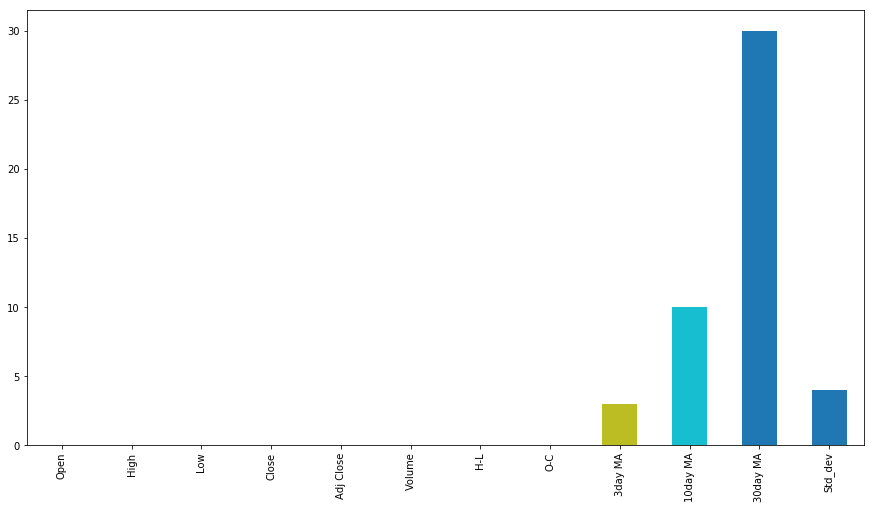

In [14]:
df_missing_count = df.isnull().sum() # Values of -1 is missing data
plt.rcParams['figure.figsize'] = (15,8)
df_missing_count.plot.bar()
plt.show()

In [15]:
for column in df:
    print("{0:15} {1:6d} {2:6}".format(column, df[column].nunique(), (df[column] == -1).sum()))

Open              1094      0
High              1117      0
Low               1097      0
Close             1117      0
Adj Close         1254      0
Volume            1675      0
H-L                414      0
O-C               1676      0
3day MA           1656      0
10day MA          1661      0
30day MA          1649      0
Std_dev           1665      0


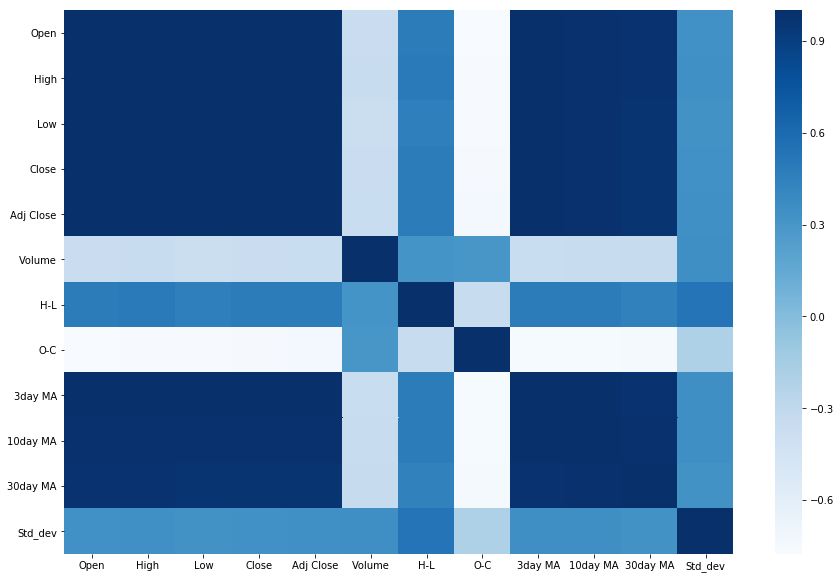

In [16]:
import seaborn as sns
#sns.set_style('White')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(15,10))
sns.heatmap(df[1:].corr(), cmap='Blues')
plt.show()

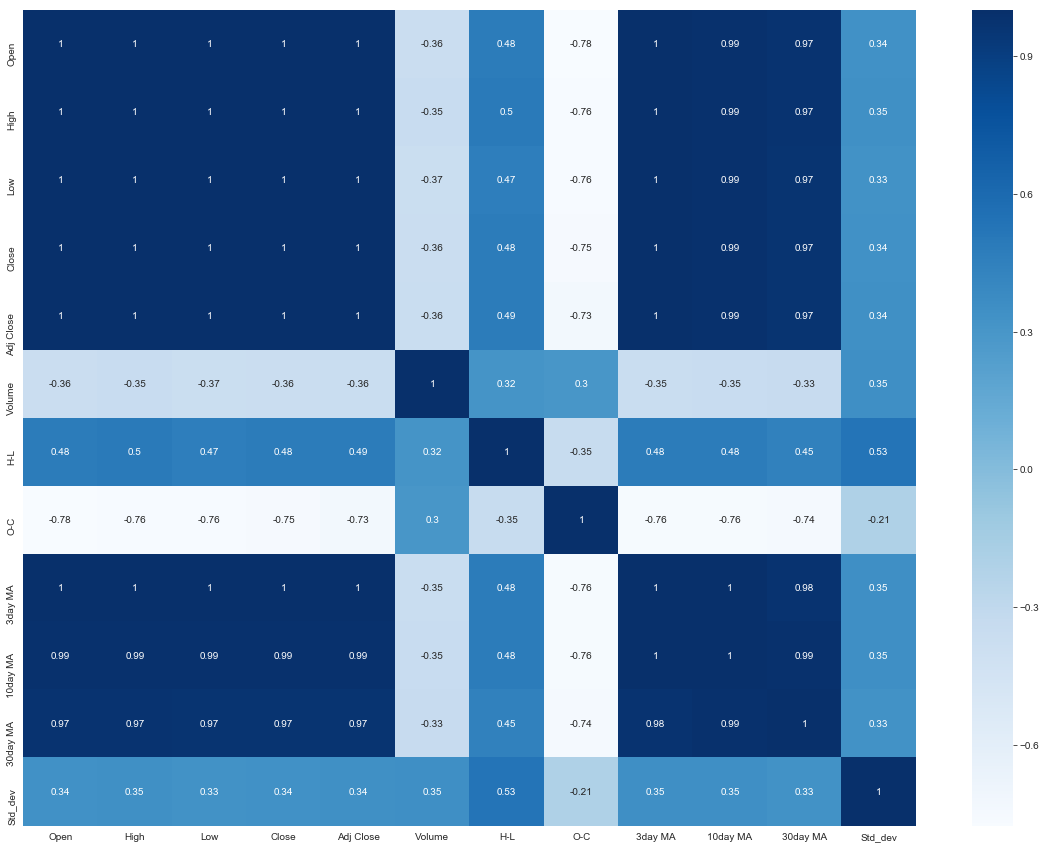

In [17]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20, 15))
sns.heatmap(df.iloc[:df.shape[0]].corr(), annot = True, cmap = 'Blues')
plt.show()

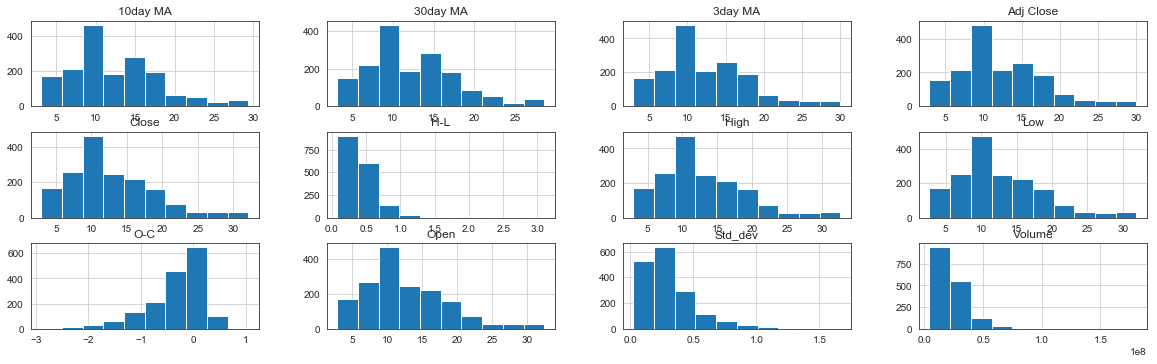

In [18]:
columns_multi = [x for x in list(df.columns)]
columns_multi
plt.rcParams['figure.figsize'] = (20,20)
names = columns_multi
df.hist(layout = (10,4), column = columns_multi)
plt.show()

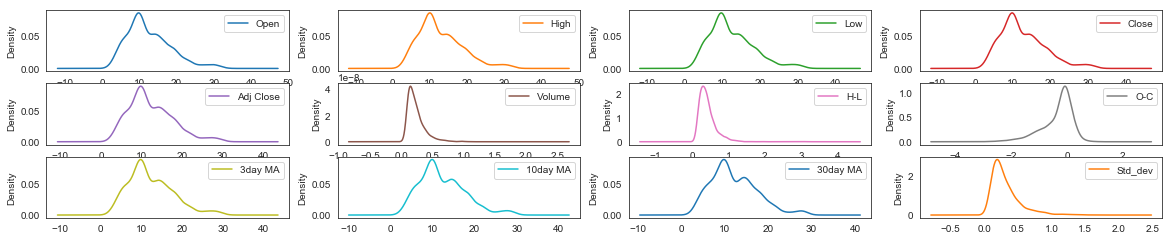

In [19]:
names = columns_multi
df.plot(kind='density', subplots=True, layout=(15,4), sharex=False)
plt.show()

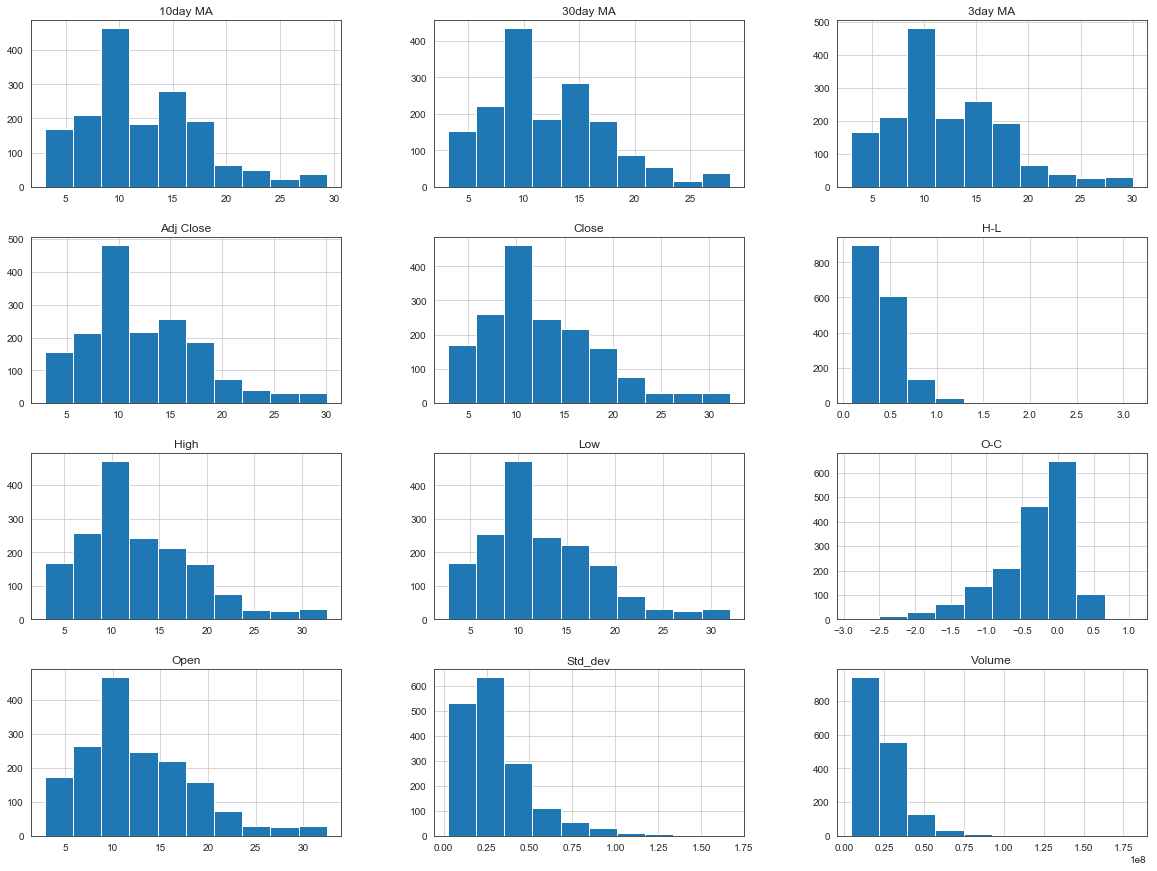

In [20]:
df.hist()
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

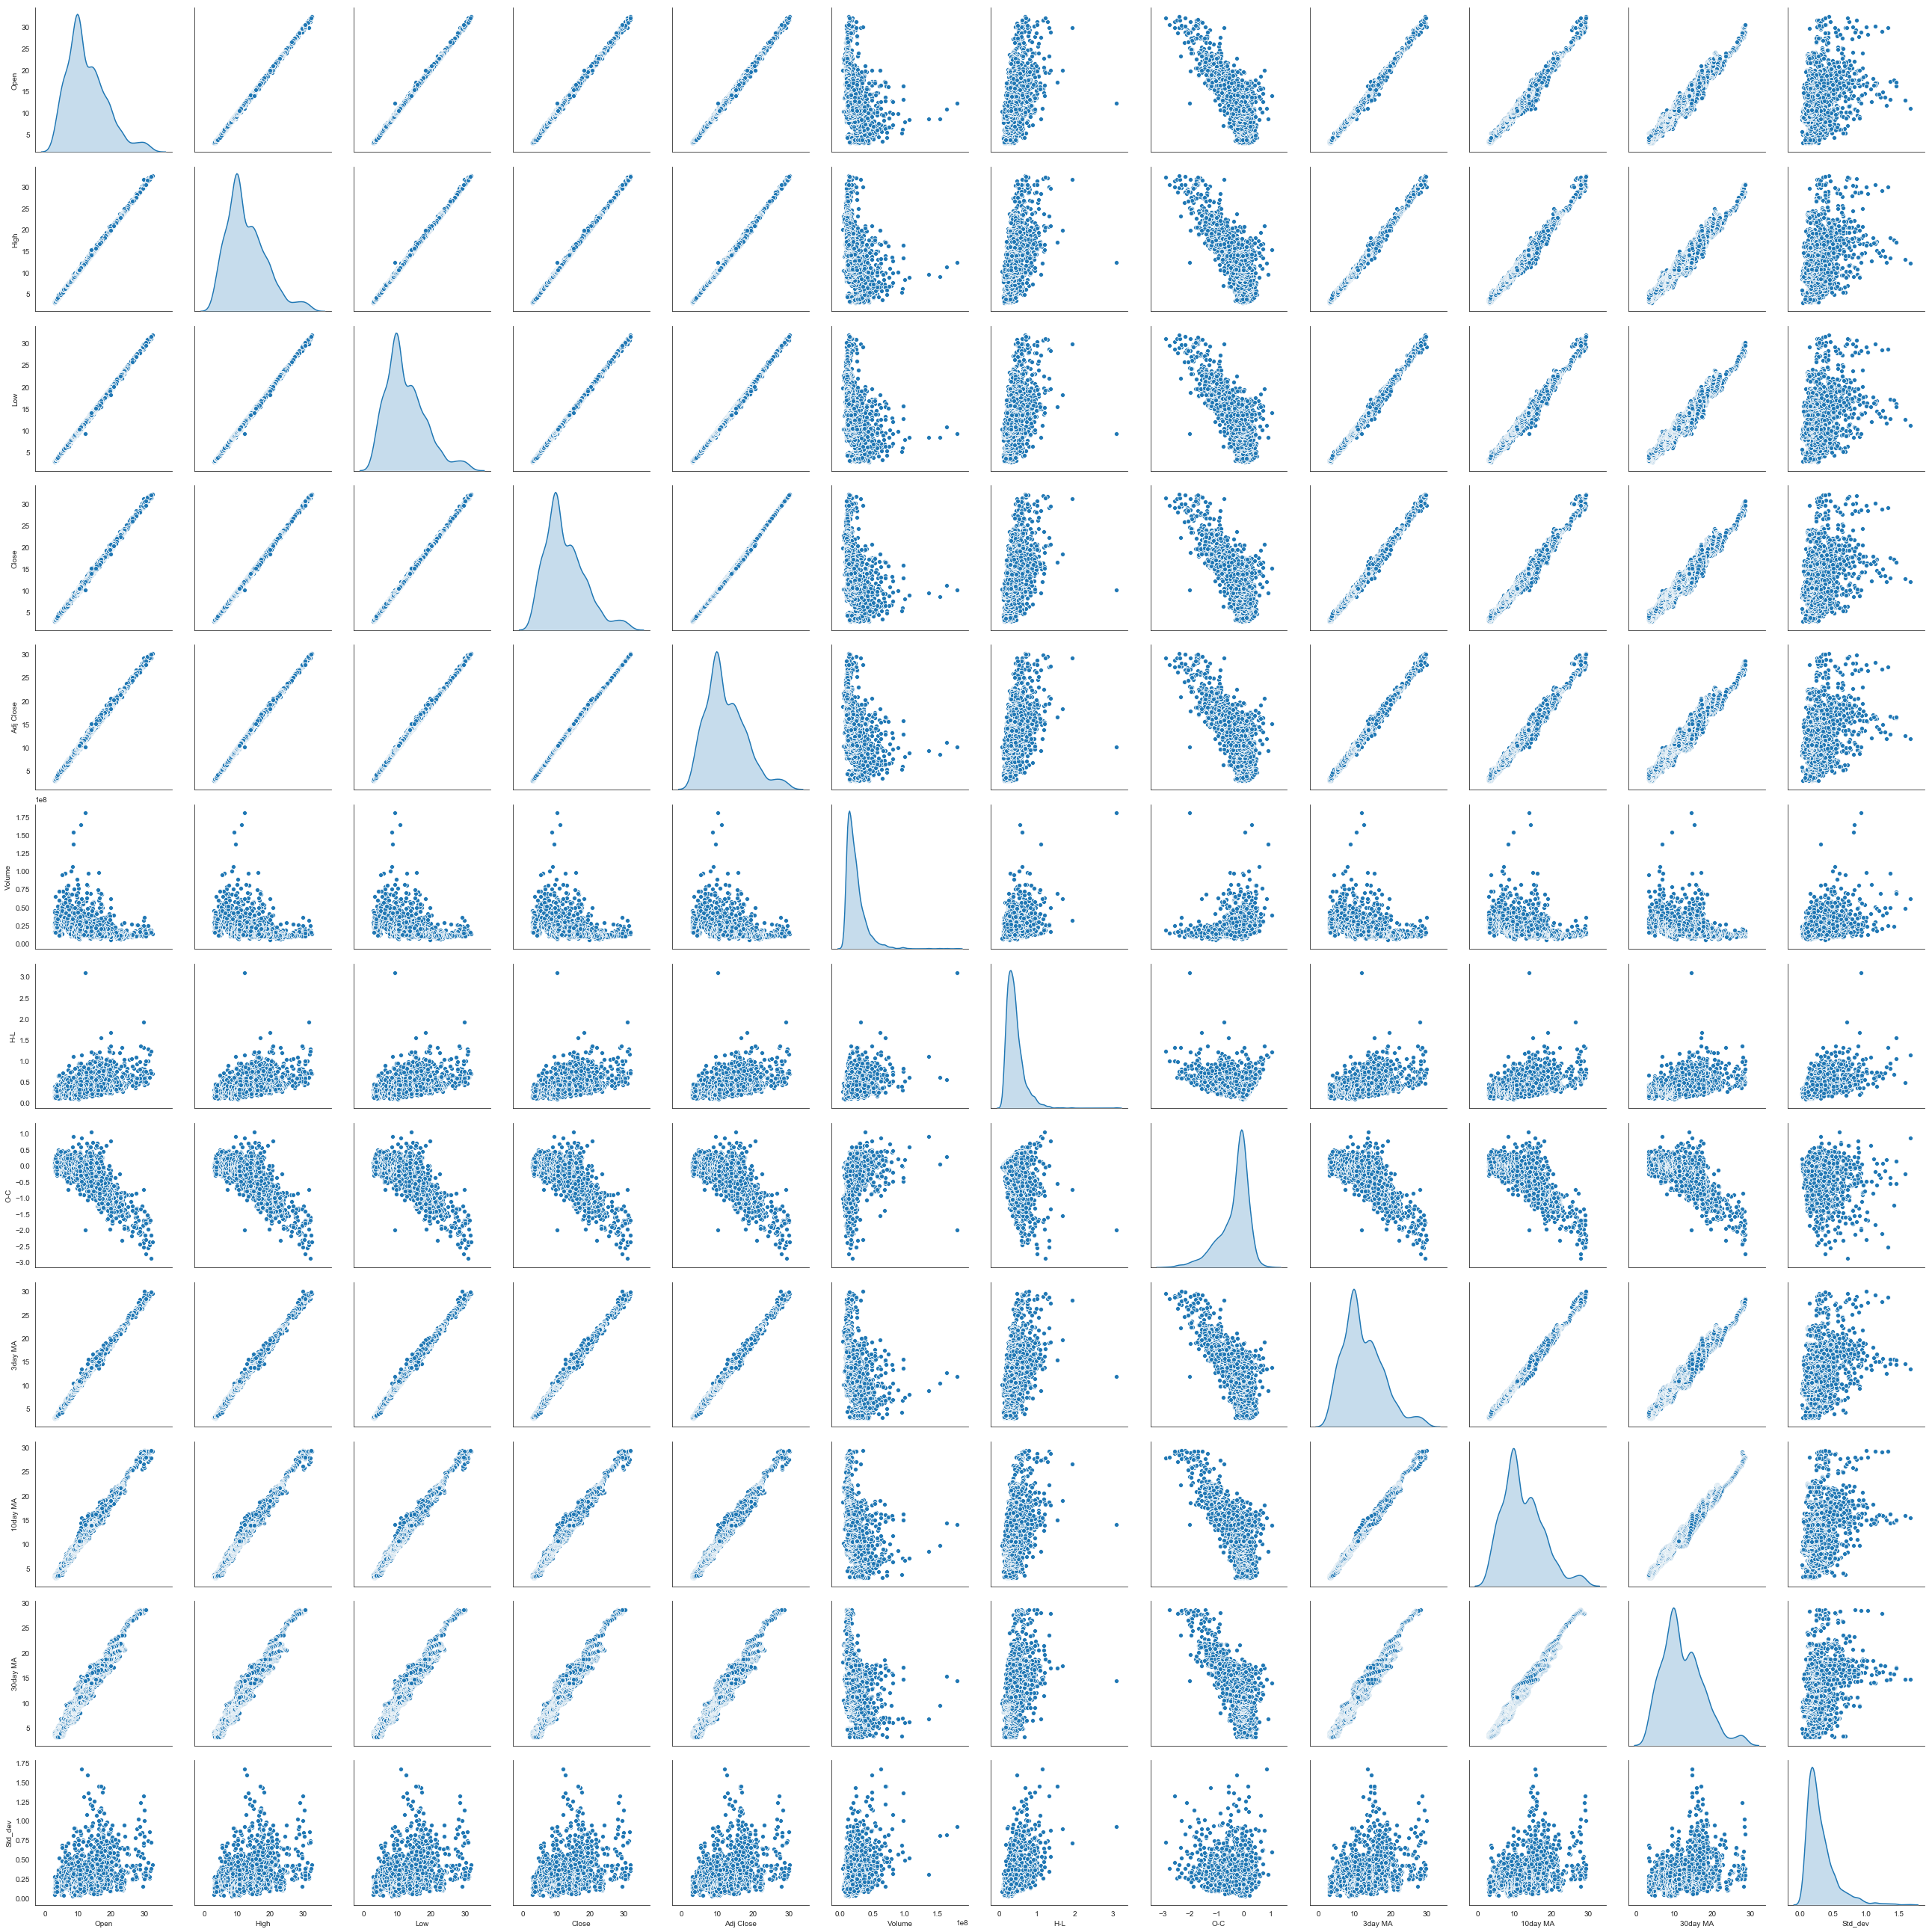

In [21]:
sns.pairplot(df, size=3, diag_kind="kde")
plt.show()

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,,,,,,,
2012-01-03,25.370001,26.340000,25.320000,26.110001,24.454784,12754300,1.020000,-0.915217,NaN,NaN,NaN,NaN
2012-01-04,25.910000,26.580000,25.910000,26.459999,24.782595,12351500,0.670000,-1.127405,NaN,NaN,NaN,NaN
2012-01-05,26.309999,26.370001,25.870001,26.110001,24.454784,8568600,0.500000,-1.855215,NaN,NaN,NaN,NaN
2012-01-06,26.250000,26.250000,25.639999,25.690001,24.061409,8532100,0.610001,-2.188591,24.564054,NaN,NaN,NaN
2012-01-09,26.080000,26.969999,25.930000,26.879999,25.175968,26046600,1.039999,-0.904032,24.432929,NaN,NaN,0.417236


In [23]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,,,,,,,
2012-02-15,28.930000,29.080000,28.420000,28.620001,26.805664,19915700,0.660000,-2.124336,27.704806,29.015117,27.769431,1.232393
2012-02-16,28.830000,29.600000,28.250000,29.340000,27.480021,16355400,1.350000,-1.349979,27.408214,28.777219,27.847794,0.535466
2012-02-17,29.780001,29.790001,29.209999,29.320000,27.461287,15366300,0.580002,-2.318714,27.158452,28.611440,27.937708,0.521985
2012-02-21,29.760000,29.770000,29.020000,29.209999,27.358263,10684100,0.750000,-2.401737,27.248991,28.434422,28.037925,0.278363
2012-02-22,29.510000,29.770000,29.270000,29.490000,27.620512,12845900,0.500000,-1.889488,27.433190,28.225558,28.147820,0.315721


In [24]:
Y = df['Adj Close'].values
X = df.as_matrix()
colnames = df.columns

In [25]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [27]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

finished


C:\Users\Tin Hang\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [29]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [30]:
#  Random Forest feature ranking
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50building tree 2 of 50
building tree 3 of 50building tree 4 of 50

building tree 5 of 50building tree 6 of 50

building tree 7 of 50
building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50building tree 25 of 50building tree 26 of 50
building tree 27 of 50


building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50building tree 39 of 50building tree 40 of 50


building tree 41 of 50building tree 42 of 50

building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [31]:
# Creating the Feature Ranking Matrix
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
Open	0.0	0.86	0.0	0.91	0.44	0.05	0.38
High	0.0	0.0	0.01	0.36	0.08	0.32	0.13
Low	0.0	0.0	0.0	0.18	0.07	0.3	0.09
Close	0.32	0.0	0.08	0.55	0.06	0.46	0.24
Adj Close	1.0	1.0	1.0	1.0	1.0	1.0	1.0
Volume	0.0	0.0	0.0	0.0	0.0	0.0	0.0
H-L	0.0	0.0	0.0	0.64	0.01	0.0	0.11
O-C	0.0	0.86	0.0	0.82	0.56	0.0	0.37
3day MA	0.0	0.0	0.0	0.45	0.05	0.23	0.12
10day MA	0.0	0.0	0.0	0.09	0.01	0.03	0.02
30day MA	0.0	0.0	0.0	0.27	0.01	0.0	0.05
Std_dev	0.0	0.0	0.0	0.73	0.01	0.0	0.12


In [32]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

<Figure size 720x576 with 0 Axes>

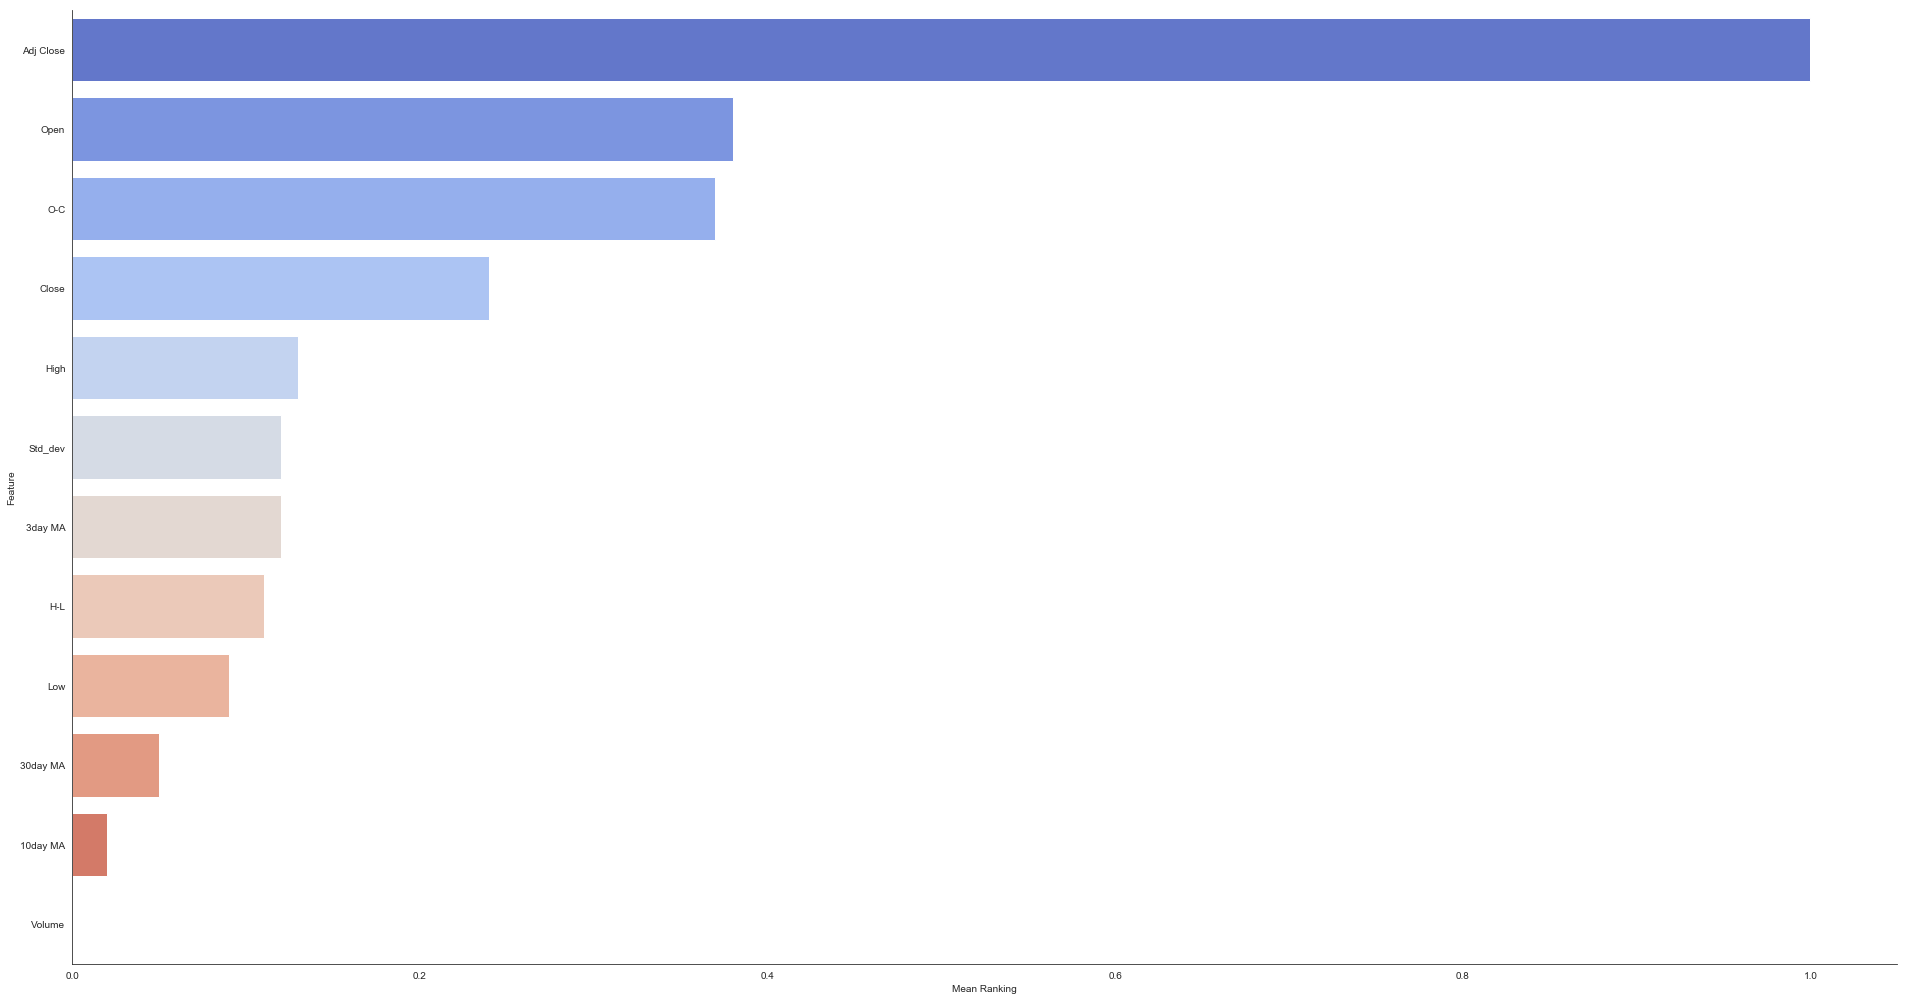

In [33]:
nplot = meanplot.sort_values('Mean Ranking', ascending=False)

# Let's plot the ranking of the features
plt.figure(figsize=(10,8))# Change Size
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')